In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('yellow_tripdata_sample.csv')
df=pd.DataFrame(data)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

In [5]:
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']

In [8]:
df['trip_distance'].mode()

0    0.9
1    1.1
Name: trip_distance, dtype: float64

In [10]:
for col in columns:
    print(f"\n--- {col.upper()} ---")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode().tolist() if not df[col].mode().empty else 'No Mode'}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Variance: {df[col].var()}")
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurt()}")
    print(f"Count (Non-null): {df[col].count()}")
    print(f"Missing Values: {df[col].isnull().sum()}")



--- PASSENGER_COUNT ---
Mean: 1.5819095477386935
Median: 1.0
Mode: [1.0]
Min: 0.0
Max: 6.0
Standard Deviation: 0.9116253266978451
Variance: 0.8310607362769529
Skewness: 1.6643298072083297
Kurtosis: 2.827890429140433
Count (Non-null): 995
Missing Values: 0

--- TRIP_DISTANCE ---
Mean: 2.8904723618090453
Median: 1.96
Mode: [0.9, 1.1]
Min: 0.0
Max: 23.9
Standard Deviation: 3.125267807919388
Variance: 9.767298871217255
Skewness: 3.2881722319456728
Kurtosis: 13.975566356327981
Count (Non-null): 995
Missing Values: 0

--- FARE_AMOUNT ---
Mean: 18.27859296482412
Median: 14.2
Mode: [6.5]
Min: -47.8
Max: 180.0
Standard Deviation: 14.916422223234436
Variance: 222.49965194180214
Skewness: 3.0124402462143554
Kurtosis: 20.739872581623793
Count (Non-null): 995
Missing Values: 0

--- TOTAL_AMOUNT ---
Mean: 26.84753768844221
Median: 22.2
Mode: [16.32]
Min: -52.8
Max: 217.2
Standard Deviation: 18.09201780111972
Variance: 327.32110811603286
Skewness: 3.025343707163598
Kurtosis: 20.194070844679576
Count

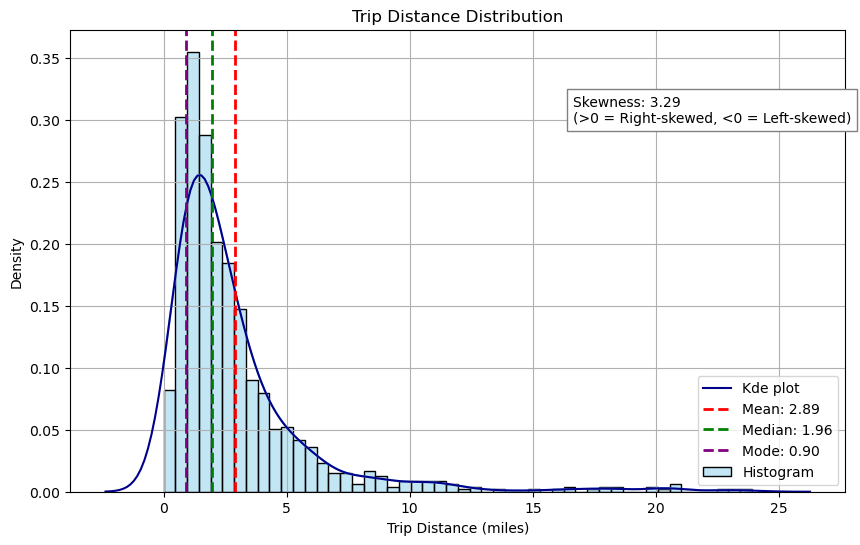

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['trip_distance'], bins=50, kde=True, color='skyblue',stat='density', label='Histogram')
sns.kdeplot(df['trip_distance'], color='darkblue', label='Kde plot')

mean=df['trip_distance'].mean()
median=df['trip_distance'].median()
mode=df['trip_distance'].mode().iloc[0]

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mode, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode:.2f}')

# Add skewness text
skewness = df['trip_distance'].skew()
text_color = 'black'
plt.text(x=plt.xlim()[1]*0.6, y=plt.ylim()[1]*0.8,
         s=f"Skewness: {skewness:.2f}\n(>0 = Right-skewed, <0 = Left-skewed)",
         color=text_color, fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))

plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


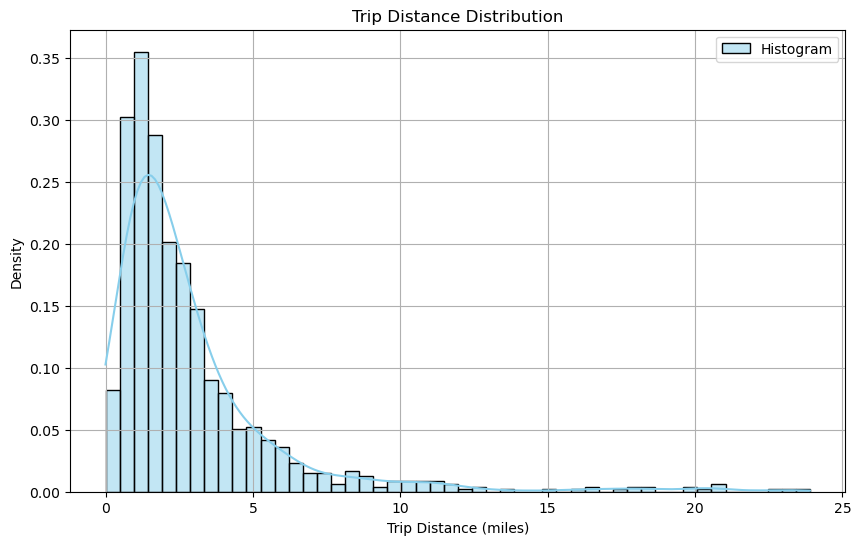

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['trip_distance'], bins=50, kde=True, color='skyblue',stat='density', label='Histogram')
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


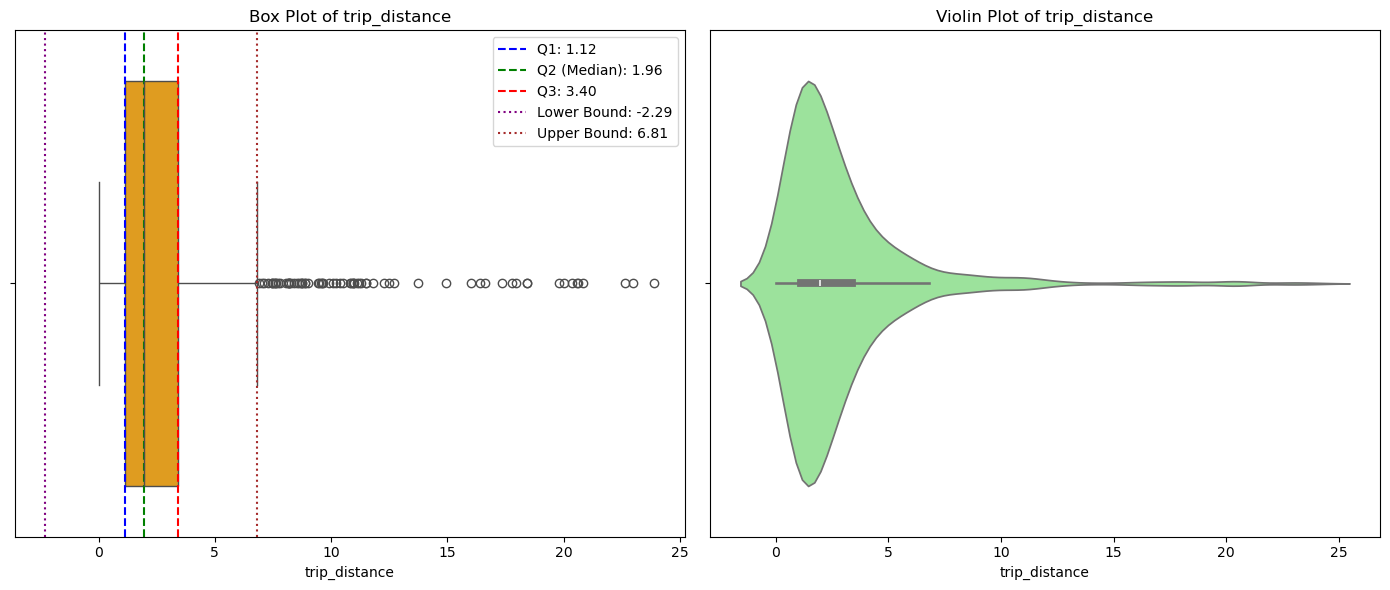

In [34]:
# Calculate quartiles and IQR
q1 = df['trip_distance'].quantile(0.25)
q2 = df['trip_distance'].median()
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Prepare the figure
plt.figure(figsize=(14,6))

# Boxplot with annotations
plt.subplot(1, 2, 1)
sns.boxplot(x=df['trip_distance'], color='orange')
plt.title('Box Plot of trip_distance')

# Annotate Q1, Q2, Q3
plt.axvline(q1, color='blue', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Q2 (Median): {q2:.2f}')
plt.axvline(q3, color='red', linestyle='--', label=f'Q3: {q3:.2f}')
plt.axvline(lower_bound, color='purple', linestyle=':', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='brown', linestyle=':', label=f'Upper Bound: {upper_bound:.2f}')

plt.legend(loc='upper right')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x=df['trip_distance'], color='lightgreen')
plt.title('Violin Plot of trip_distance')

plt.tight_layout()
plt.show()


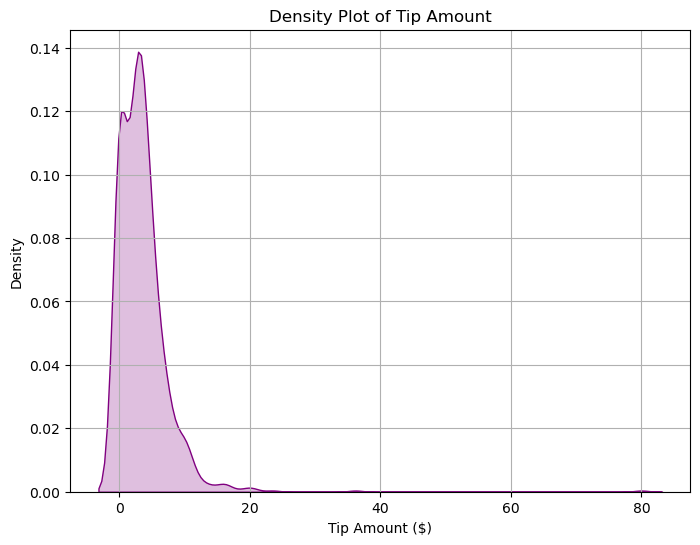

In [25]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['tip_amount'], fill=True, color='purple')
plt.title('Density Plot of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


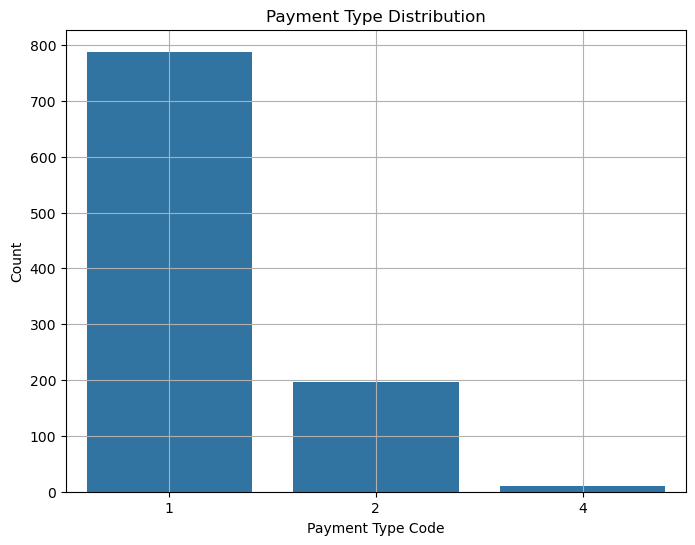

In [26]:
plt.figure(figsize=(8,6))
payment_counts = df['payment_type'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type Code')
plt.ylabel('Count')
plt.grid(True)
plt.show()


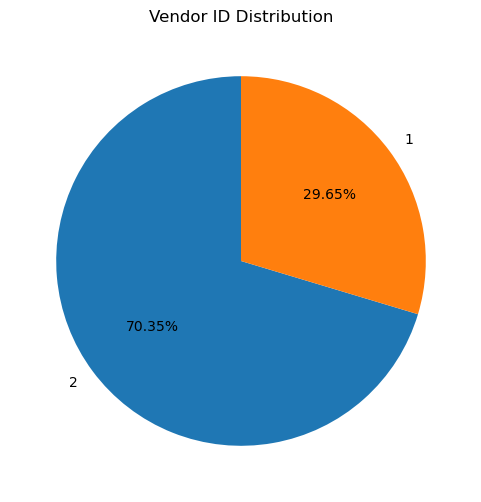

In [28]:
plt.figure(figsize=(6,6))
vendor_counts = df['VendorID'].value_counts()
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Vendor ID Distribution')
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue',stat='density', label='Histogram')
sns.kdeplot(df['trip_distance'], color='darkblue', label='Frequency Polygon')
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
